In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf

In [20]:
#Getting the dataset
mnist = tf.keras.datasets.mnist

In [21]:
#Defining the train and test set alongwith their labels
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
# Reshape images to add a channel dimension (28x28x1 for grayscale)
training_images = training_images.reshape((training_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [23]:
#checking the shape after reshaping
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#normalizing the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Define the CNN model
model = Sequential()

In [ ]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,054 (179.90 KB)

 Trainable params: 46,054 (179.90 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(training_images, training_labels, epochs=8, validation_data=(test_images, test_labels))

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.8756 - loss: 0.3901 - val_accuracy: 0.9839 - val_loss: 0.0522
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9865 - val_loss: 0.0413
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9879 - val_loss: 0.0344
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9916 - loss: 0.0278 - val_accuracy: 0.9912 - val_loss: 0.0260
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9906 - val_loss: 0.0291
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 23ms/step - accuracy: 0.9941 - loss: 0.0191 - val_accuracy: 0.9909 - val_loss: 0.0274
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9947 - loss: 0.0153 - val_accuracy: 0.9899 - val_loss: 0.0326
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9963 - loss: 0

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9913 - loss: 0.0335
Test Loss: 0.033466141670942307
Test Accuracy: 0.9912999868392944


# Task
Visualize the filters of each convolutional layer in the model.

## Identify convolutional layers

### Subtask:
Iterate through the layers of the model and identify the convolutional layers.


**Reasoning**:
Iterate through the model's layers and identify the convolutional layers by checking their type.



In [15]:
conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
print(conv_layers)

[<Conv2D name=conv2d, built=True>, <Conv2D name=conv2d_1, built=True>]


## Extract filter weights

### Subtask:
Get the weights (filters) from each convolutional layer.


**Reasoning**:
Get the weights (filters) from each convolutional layer and store them.



In [16]:
filters = []
for layer in conv_layers:
  # Get the weights of the layer. The first element is the filter weights.
  layer_weights = layer.get_weights()[0]
  filters.append(layer_weights)

# Display the shape of the filters for verification
for i, filt in enumerate(filters):
  print(f"Shape of filters for convolutional layer {i+1}: {filt.shape}")

Shape of filters for convolutional layer 1: (3, 3, 1, 32)
Shape of filters for convolutional layer 2: (3, 3, 32, 16)


## Visualize filters

### Subtask:
Plot each filter as an image.


**Reasoning**:
Plot each filter as an image using matplotlib.



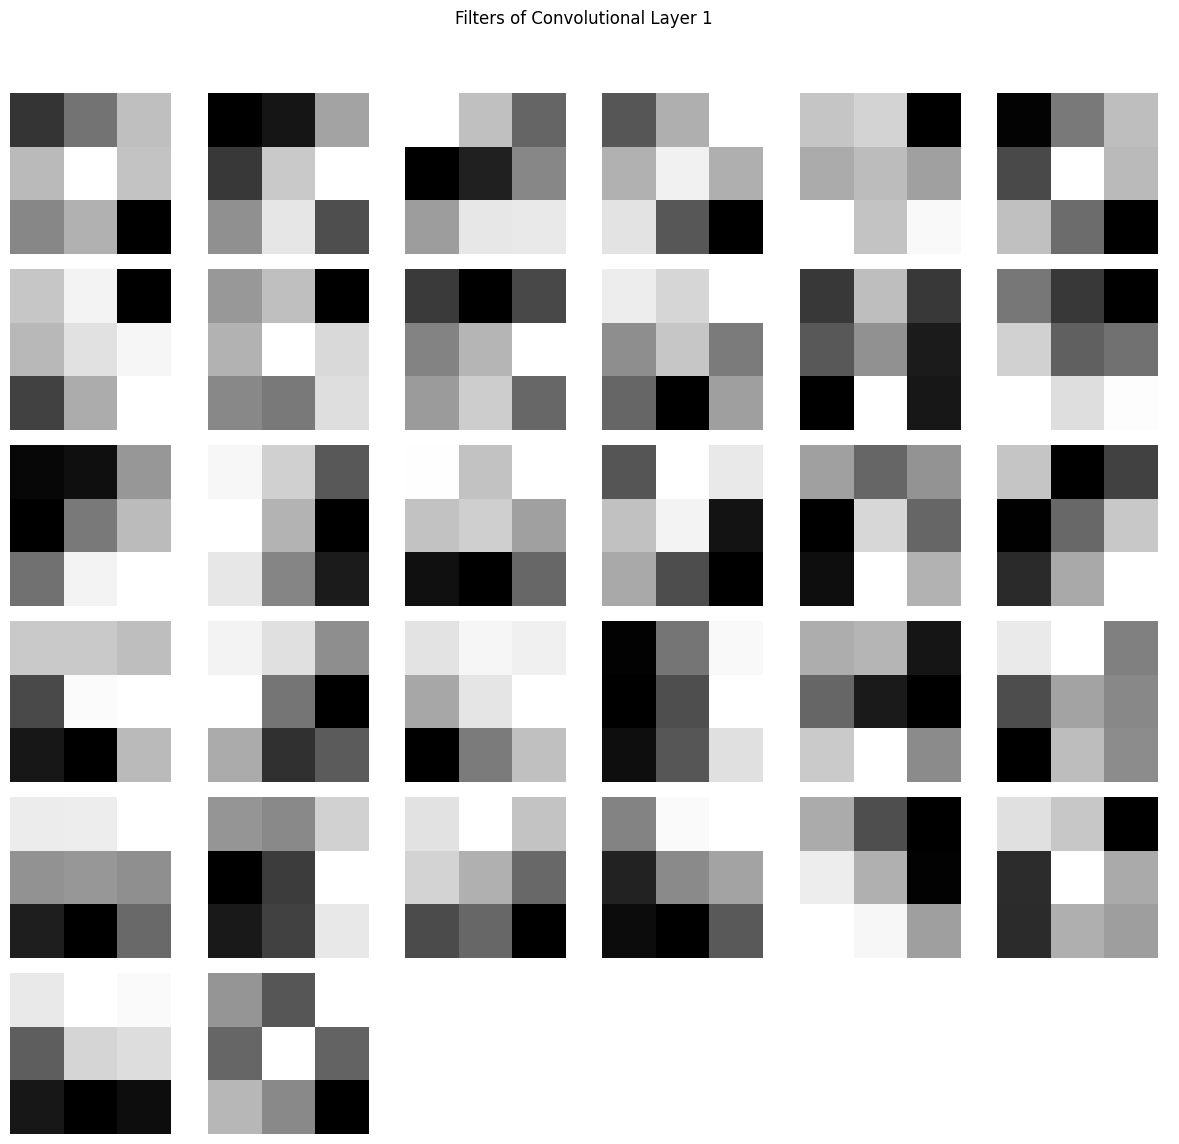

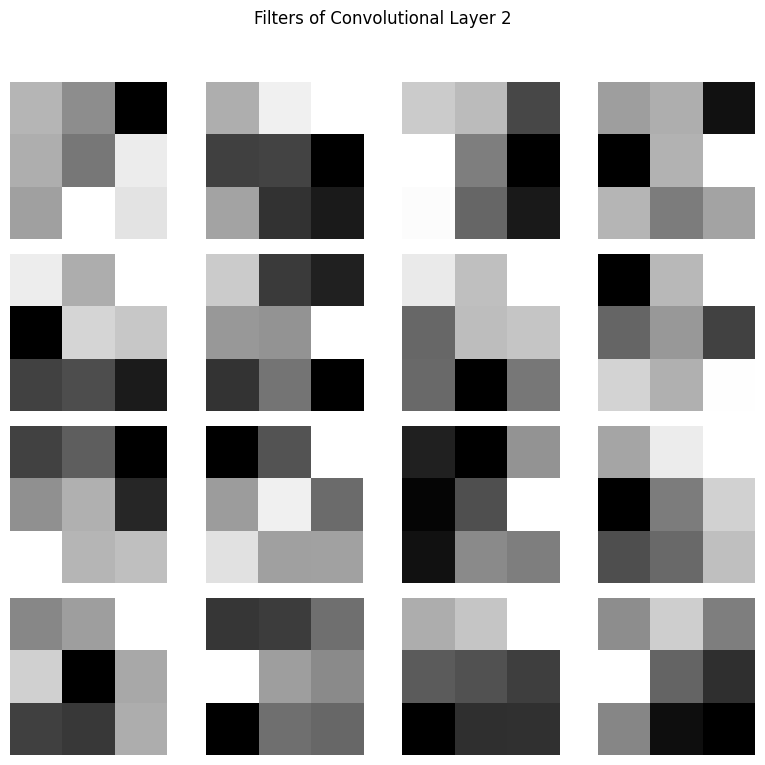

In [17]:
import matplotlib.pyplot as plt

for i, layer_filters in enumerate(filters):
    # Determine the number of filters and filter size
    num_filters = layer_filters.shape[-1]
    filter_height, filter_width, num_input_channels = layer_filters.shape[:3]

    # Calculate grid dimensions for plotting
    grid_size = int(num_filters**0.5)
    if grid_size * grid_size < num_filters:
      grid_size += 1

    # Create a figure and subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    # Iterate through each filter and plot
    for j in range(num_filters):
        # Visualize the filter for the first input channel
        filter_image = layer_filters[:, :, 0, j]
        axes[j].imshow(filter_image, cmap='gray')
        axes[j].axis('off') # Turn off axes

    # Turn off remaining unused subplots
    for k in range(num_filters, len(axes)):
        axes[k].axis('off')

    # Add a title to the figure
    fig.suptitle(f'Filters of Convolutional Layer {i+1}')

    # Adjust layout and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for title
    plt.show()

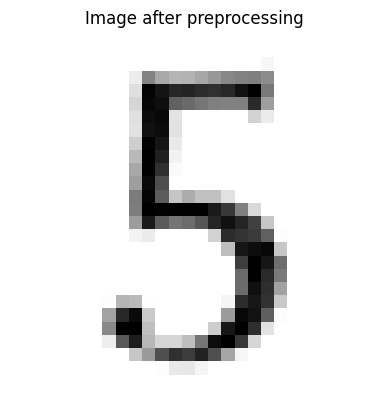

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


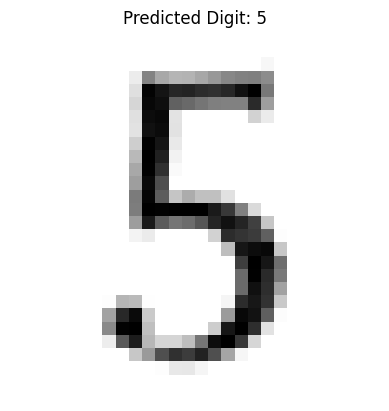

Prediction Probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0031
Digit 3: 0.0060
Digit 4: 0.0439
Digit 5: 0.8360
Digit 6: 0.0003
Digit 7: 0.0005
Digit 8: 0.1101
Digit 9: 0.0000


In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Define the path to the image
image_path = '/content/drive/MyDrive/Colab Notebooks/5.jpeg'  # Change this path to your image file

# Check if the image file exists, if not, inform the user
if not os.path.exists(image_path):
    print(f"Error: Image not found at {image_path}. Please provide a valid path to your image file.")
else:
    # Load and preprocess the image
    img = Image.open(image_path).convert('L') # Convert to grayscale
    img = img.resize((28, 28)) # Resize to 28x28
    img_array = np.array(img) # Convert to numpy array
    img_array = img_array.reshape((28, 28, 1)) # Reshape to add channel dimension
    img_array = img_array / 255.0 # Normalize

    # Visualize the image after preprocessing
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title('Image after preprocessing')
    plt.axis('off')
    plt.show()

    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Display the image and prediction
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_class[0]}')
    plt.axis('off')
    plt.show()

    # Print the confidence scores for each class
    print("Prediction Probabilities:")
    for i, prob in enumerate(predictions[0]):
        print(f"Digit {i}: {prob:.4f}")